<a href="https://colab.research.google.com/github/noctxrne/ICT-Notes/blob/main/12_Decoding_and_Encoding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Encoding**

Process of converting categorical data into numerical form for machine learning models.

Types:

Label Encoding – Assigns a unique number to each category.

One-Hot Encoding – Creates binary columns for each category.

Use Case: When working with algorithms that require numerical input (e.g., Logistic Regression, SVM).

## 2. **Scaling & Normalization**

Used to bring features into a similar range so that no variable dominates others.

Scaling: Reshapes data within a fixed range.

Example: Min-Max Scaling → values between 0 and 1.

Normalization: Adjusts data to have unit norm (vector length = 1).

Example: Used in distance-based algorithms like KNN.

Standardization (Z-score scaling): Mean = 0, Std Dev = 1.

## 3. **Correlation**

Measures the relationship/association between two variables.

Values range -1 to +1:

+1 → strong positive relation

-1 → strong negative relation

0 → no relation

Helps in feature selection (remove highly correlated variables to avoid multicollinearity).

Types: Pearson (linear), Spearman (rank-based), Kendall (ordinal).

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
student_df=pd.DataFrame({
    'Student_ID':[1,2,3,4,5],
    'Performance_Level':['Low','Medium','High','Medium','Low'],
    'Gender':['Male','Female','Male','Male','Female'],
    'Math_Score':[75,85,90,78,80],
    'English_Score':[82,88,3,4,5],
    'Major':['Science','Arts','Science','Commerce','Arts']
})

In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major
0,1,Low,Male,75,82,Science
1,2,Medium,Female,85,88,Arts
2,3,High,Male,90,3,Science
3,4,Medium,Male,78,4,Commerce
4,5,Low,Female,80,5,Arts


In [ ]:
ordinal_enc=OrdinalEncoder(categories=[['Low','Medium','High']])
student_df['Performance_Level']=ordinal_enc.fit_transform(student_df[['Performance_Level']])

In [ ]:
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major
0,1,0.0,Male,75,82,Science
1,2,1.0,Female,85,88,Arts
2,3,2.0,Male,90,3,Science
3,4,1.0,Male,78,4,Commerce
4,5,0.0,Female,80,5,Arts


In [ ]:
label_enc=LabelEncoder()
student_df['Gender_enc']=label_enc.fit_transform(student_df[['Gender']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
student_df


,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Gender_enc
0,1,0.0,Male,75,82,Science,1
1,2,1.0,Female,85,88,Arts,0
2,3,2.0,Male,90,3,Science,1
3,4,1.0,Male,78,4,Commerce,1
4,5,0.0,Female,80,5,Arts,0


In [ ]:
new_students_df=pd.get_dummies(student_df,
                               columns=['Major'],
                               prefix='ma',
                               drop_first=True,
                               dtype='int64')

In [ ]:
new_students_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Gender_enc,ma_Commerce,ma_Science
0,1,0.0,Male,75,82,1,0,1
1,2,1.0,Female,85,88,0,0,0
2,3,2.0,Male,90,3,1,0,1
3,4,1.0,Male,78,4,1,1,0
4,5,0.0,Female,80,5,0,0,0


In [ ]:
titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df


,Unnamed: 0,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,2,1,female,26.0,0,0,7.9250,Third,Southampton
3,3,1,female,35.0,1,0,53.1000,First,Southampton
4,4,0,male,35.0,0,0,8.0500,Third,Southampton
...,...,...,...,...,...,...,...,...,...
886,886,0,male,27.0,0,0,13.0000,Second,Southampton
887,887,1,female,19.0,0,0,30.0000,First,Southampton
888,888,0,female,28.0,1,2,23.4500,Third,Southampton
889,889,1,male,26.0,0,0,30.0000,First,Cherbourg


In [ ]:
label_enc=LabelEncoder()
titanic_df['sex']=label_enc.fit_transform(titanic_df[['sex']])

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
titanic_df=pd.get_dummies(titanic_df,
                               columns=['embark_town'],
                               prefix='et',
                               drop_first=True,
                               dtype='int64')

In [ ]:
titanic_df

,Unnamed: 0,survived,sex,age,sibsp,parch,fare,class,et_Queenstown,et_Southampton
0,0,0,1,22.0,1,0,7.2500,Third,0,1
1,1,1,0,38.0,1,0,71.2833,First,0,0
2,2,1,0,26.0,0,0,7.9250,Third,0,1
3,3,1,0,35.0,1,0,53.1000,First,0,1
4,4,0,1,35.0,0,0,8.0500,Third,0,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,27.0,0,0,13.0000,Second,0,1
887,887,1,0,19.0,0,0,30.0000,First,0,1
888,888,0,0,28.0,1,2,23.4500,Third,0,1
889,889,1,1,26.0,0,0,30.0000,First,0,0


In [ ]:
#Standard Scaling

from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt

In [ ]:
std_scaler=StandardScaler()
minmax_scaler=MinMaxScaler()

#standard scaling of both math score and english score
student_df['Math_Score_std']=std_scaler.fit_transform(student_df[['Math_Score']])
student_df['English_Score_std']=std_scaler.fit_transform(student_df[['English_Score']])
student_df


,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Gender_enc,Math_Score_std,English_Score_std
0,1,0.0,Male,75,82,Science,1,-1.241971,1.147687
1,2,1.0,Female,85,88,Arts,0,0.639803,1.298698
2,3,2.0,Male,90,3,Science,1,1.580691,-0.840630
3,4,1.0,Male,78,4,Commerce,1,-0.677439,-0.815461
4,5,0.0,Female,80,5,Arts,0,-0.301084,-0.790293


In [ ]:
#MinMax Scaling of both English and math score
student_df['Math_Score_minmax']=minmax_scaler.fit_transform(student_df[['Math_Score']])
student_df['English_Score_minmax']=minmax_scaler.fit_transform(student_df[['English_Score']])
student_df

,Student_ID,Performance_Level,Gender,Math_Score,English_Score,Major,Gender_enc,Math_Score_std,English_Score_std,Math_Score_minmax,English_Score_minmax
0,1,0.0,Male,75,82,Science,1,0.000000,0.929412,0.000000,0.929412
1,2,1.0,Female,85,88,Arts,0,0.666667,1.000000,0.666667,1.000000
2,3,2.0,Male,90,3,Science,1,1.000000,0.000000,1.000000,0.000000
3,4,1.0,Male,78,4,Commerce,1,0.200000,0.011765,0.200000,0.011765
4,5,0.0,Female,80,5,Arts,0,0.333333,0.023529,0.333333,0.023529


In [ ]:
titanic_df

,Unnamed: 0,survived,sex,age,sibsp,parch,fare,class,et_Queenstown,et_Southampton
0,0,0,1,22.0,1,0,7.2500,Third,0,1
1,1,1,0,38.0,1,0,71.2833,First,0,0
2,2,1,0,26.0,0,0,7.9250,Third,0,1
3,3,1,0,35.0,1,0,53.1000,First,0,1
4,4,0,1,35.0,0,0,8.0500,Third,0,1
...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,27.0,0,0,13.0000,Second,0,1
887,887,1,0,19.0,0,0,30.0000,First,0,1
888,888,0,0,28.0,1,2,23.4500,Third,0,1
889,889,1,1,26.0,0,0,30.0000,First,0,0


In [ ]:
#MinMax Scaling of both fare and age
titanic_df['fare_minmax']=minmax_scaler.fit_transform(titanic_df[['fare']])
titanic_df['age_minmax']=minmax_scaler.fit_transform(titanic_df[['age']])
titanic_df

,Unnamed: 0,survived,sex,age,sibsp,parch,fare,class,et_Queenstown,et_Southampton,fare_minmax,age_minmax
0,0,0,1,22.0,1,0,7.2500,Third,0,1,0.014151,0.387585
1,1,1,0,38.0,1,0,71.2833,First,0,0,0.139136,0.687358
2,2,1,0,26.0,0,0,7.9250,Third,0,1,0.015469,0.462528
3,3,1,0,35.0,1,0,53.1000,First,0,1,0.103644,0.631151
4,4,0,1,35.0,0,0,8.0500,Third,0,1,0.015713,0.631151
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,27.0,0,0,13.0000,Second,0,1,0.025374,0.481264
887,887,1,0,19.0,0,0,30.0000,First,0,1,0.058556,0.331378
888,888,0,0,28.0,1,2,23.4500,Third,0,1,0.045771,0.500000
889,889,1,1,26.0,0,0,30.0000,First,0,0,0.058556,0.462528


<Axes: >

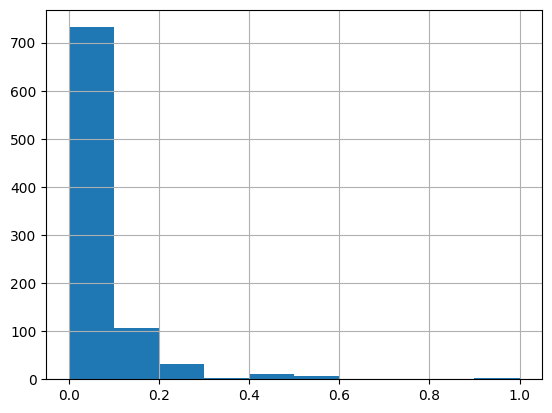

In [ ]:
titanic_df['fare_minmax'].hist()

<Axes: >

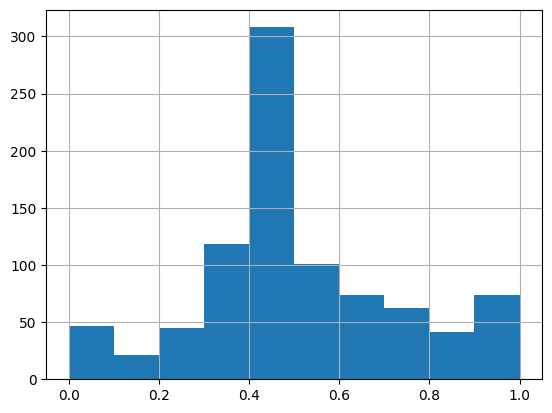

In [ ]:
titanic_df['age_minmax'].hist()

In [ ]:
from sklearn.model_selection  import train_test_split

#Train Test Split
y=titanic_df['survived']
x=titanic_df.drop(columns=['survived'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,Unnamed: 0,sex,age,sibsp,parch,fare,class,et_Queenstown,et_Southampton,fare_minmax,age_minmax
331,331,1,45.5,0,0,28.5000,First,0,1,0.055628,0.827877
733,733,1,23.0,0,0,13.0000,Second,0,1,0.025374,0.406321
382,382,1,32.0,0,0,7.9250,Third,0,1,0.015469,0.574943
704,704,1,26.0,1,0,7.8542,Third,0,1,0.015330,0.462528
813,813,0,6.0,4,2,31.2750,Third,0,1,0.061045,0.087812


In [ ]:
x_test.head()

,Unnamed: 0,sex,age,sibsp,parch,fare,class,et_Queenstown,et_Southampton,fare_minmax,age_minmax
709,709,1,28.0,1,1,15.2458,Third,0,0,0.029758,0.500000
439,439,1,31.0,0,0,10.5000,Second,0,1,0.020495,0.556207
840,840,1,20.0,0,0,7.9250,Third,0,1,0.015469,0.350113
720,720,0,6.0,0,1,33.0000,Second,0,1,0.064412,0.087812
39,39,0,14.0,1,0,11.2417,Third,0,0,0.021942,0.237698


In [ ]:
y_train.head()

,survived
331,0
733,0
382,0
704,0
813,0


In [ ]:
y_test.head()

,survived
709,1
439,0
840,0
720,1
39,1
